In [1]:
import environments
import numpy as np
from agents.agents import MonteCarloPredictor
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.tsa.stattools import adfuller

In [2]:
from sys import maxsize
np.set_printoptions(threshold=maxsize)

In [3]:
env = environments.make('hitstand')

In [4]:
print(env)

1. 6 decks
2. Dealer stands on soft 17
3. No Double Down
4. No split
5. No insurance offered
6. No surrender
7. Natural Blackjack 3:2


In [5]:
env.action_space_description

{0: 'stand', 1: 'hit'}

In [6]:
env.reward_space_description

{-1: 'The House beats Jack',
 0: 'Draw/not terminal',
 1: 'Jack beats the House',
 1.5: 'Blackjack for Jack'}

In [7]:
env.observation_space_description

{0: "Player's total", 1: "Dealer's card value", 2: 'Player has got usable ace'}

In [8]:
env.observation_space_high

array([30, 26,  1])

In [9]:
env.observation_space_low

array([4, 2, 0])

In [10]:
class RandomPolicyAgent(MonteCarloPredictor):

    def follow_policy(self, *args):
        return np.random.randint(0, self.environment.action_space_len)

In [10]:
agent = RandomPolicyAgent(env)

In [23]:
agent.follow_policy()

1

In [10]:
def run_experiment(env, agent, episodes, show, save=None, collect_rewards=None):
    rewards = []
    average_rewards = []
    for episode in range(episodes):
        if (episode+1) % show ==0:
            print('Episode {0}:'.format(episode+1))
            env.render()

        state, reward, terminal, _ = env.reset()
        agent.evaluate_state(state, reward, terminal)
        while not terminal:
            action = agent.follow_policy(state, reward, terminal)
            state, reward, terminal, _ = env.step(action)
            agent.evaluate_state(state, reward, terminal)        
        
        rewards.append(reward)
        
        if save:
            if (episode+1) % save == 0:
                agent.save_table(episode+1)
                
        if collect_rewards:
            if (episode+1) % collect_rewards == 0:
                average_reward = sum(rewards[-collect_rewards:])/collect_rewards
                average_rewards.append(average_reward)
    
    return average_rewards


In [56]:
EPISODES = 1
SHOW_EVERY = 1
SAVE_EVERY = None
COLLECT_EVERY = 1
results = run_experiment(env, agent, EPISODES, SHOW_EVERY, SAVE_EVERY, COLLECT_EVERY)

Episode 1:
Jack:
	-Cards: ['7C', 'AC']
	-Value : 18
Dealer:
	-Cards: ['JS']
	-Value : 10
Jack decides to: HIT
	-Cards: ['7C', 'AC', '10C']
	-Value : 18
Jack decides to: STAND
	-Cards: ['7C', 'AC', '10C']
	-Value : 18
Dealer:
	-Cards: ['JS', '3H', '2S', '9C']
	-Value : 24
JACK BEATS THE HOUSE


In [64]:
agent.time_steps_counter[14,8,0]

0.0

In [15]:
type(agent).__name__

'RandomPolicyAgent'

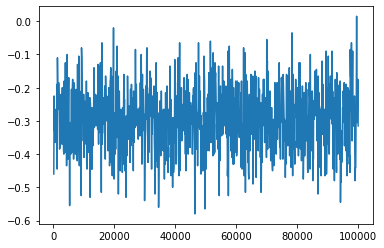

In [16]:
plt.plot(range(COLLECT_EVERY,EPISODES+1, COLLECT_EVERY), results)

In [17]:
adfuller(results)

(-30.545467478487037,
 0.0,
 0,
 999,
 {'1%': -3.4369127451400474,
  '5%': -2.864437475834273,
  '10%': -2.568312754566378},
 -1789.7191511780147)

In [11]:
class FixAgent(MonteCarloPredictor):

    def follow_policy(self, observation, *args):
        if observation[0] > 19:
            return 0
        else:
            return 1

In [12]:
agent = FixAgent(env)

In [43]:
EPISODES = 1_000_000
SHOW_EVERY = 1_000
SAVE_EVERY = None
COLLECT_EVERY = 1_000
results = run_experiment(env, agent, EPISODES, SHOW_EVERY, SAVE_EVERY, COLLECT_EVERY)

Episode 1000:
Jack:
	-Cards: ['AD', '8H']
	-Value : 19
Dealer:
	-Cards: ['3D']
	-Value : 3
Jack decides to: HIT
	-Cards: ['AD', '8H', '6C']
	-Value : 15
Jack decides to: HIT
	-Cards: ['AD', '8H', '6C', 'JC']
	-Value : 25
Dealer:
	-Cards: ['3D']
	-Value : 3
THE HOUSE BEATS JACK
Episode 2000:
Jack:
	-Cards: ['5H', 'QC']
	-Value : 15
Dealer:
	-Cards: ['10D']
	-Value : 10
Jack decides to: HIT
	-Cards: ['5H', 'QC', 'QC']
	-Value : 25
Dealer:
	-Cards: ['10D']
	-Value : 10
THE HOUSE BEATS JACK
Episode 3000:
Jack:
	-Cards: ['AH', '4C']
	-Value : 15
Dealer:
	-Cards: ['6C']
	-Value : 6
Jack decides to: HIT
	-Cards: ['AH', '4C', '6H']
	-Value : 21
Dealer:
	-Cards: ['6C', '4S', 'QH']
	-Value : 20
JACK BEATS THE HOUSE
Episode 4000:
Jack:
	-Cards: ['4D', 'JC']
	-Value : 14
Dealer:
	-Cards: ['2C']
	-Value : 2
Jack decides to: HIT
	-Cards: ['4D', 'JC', '8H']
	-Value : 22
Dealer:
	-Cards: ['2C']
	-Value : 2
THE HOUSE BEATS JACK
Episode 5000:
Jack:
	-Cards: ['AS', '2C']
	-Value : 13
Dealer:
	-Cards: ['7

In [44]:
agent.num_executed_episodes

2300000

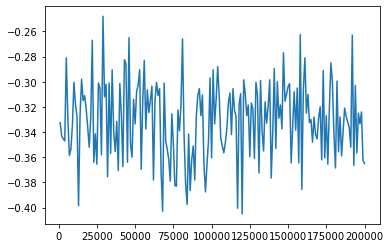

In [37]:
plt.plot(range(COLLECT_EVERY,EPISODES+1, COLLECT_EVERY), results)

In [38]:
adfuller(results)

(-15.458314116879608,
 2.7267397058912887e-28,
 0,
 199,
 {'1%': -3.4636447617687436,
  '5%': -2.8761761179270766,
  '10%': -2.57457158581854},
 -757.9779987553345)

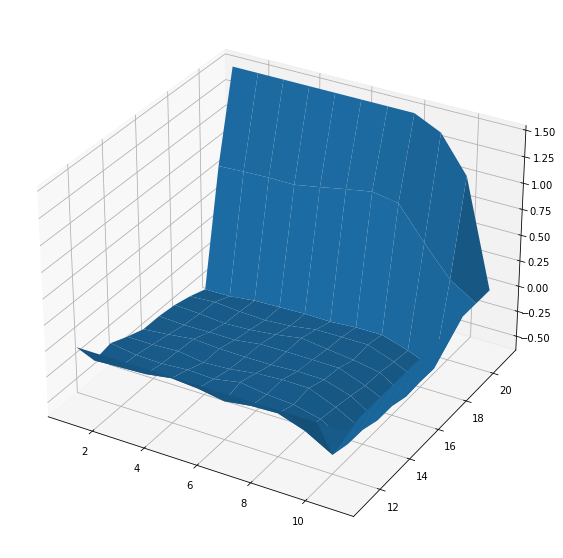

In [45]:
X, Y = np.meshgrid(np.arange(1,12), np.arange(11,22))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y, agent.table[7:18,:11,1])